# 1. 강의영상 

In [1]:
#{{<video https://youtu.be/playlist?list=PLQqh36zP38-zBs464epBRfxPpNBAKqBMS&si=It99ZTYMQHJkCk6z >}}

# 2. Imports 

In [2]:
#!pip install git+https://github.com/guebin/mp2024pkg.git

In [1]:
import numpy as np
import torch
import mp2024pkg
import transformers
import datasets
import matplotlib.pyplot as plt

/home/cgb3/anaconda3/envs/hf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 3. `numpy`와 `torch`의 비교

`-` 파이썬입문수준의 질문: numpy랑 list의 차이가 뭔가..? 

`-` 기계학습활용수준의 질문: numpy랑 torch의 차이가 뭔가..? 

## A. 공통점 

`-` 기본마인드: numpy에서 가능한건 torch에서도 가능하다고 생각하면 된다. 

`-` 벡터선언 후 브로드캐스팅 

In [2]:
tsr = torch.tensor([1,2,3])
tsr + 1

tensor([2, 3, 4])

In [3]:
arr = np.array([1,2,3])
arr + 1 

array([2, 3, 4])

`-` 형태변환 

In [4]:
tsr = torch.tensor([1,2,3])
print(
    f"텐서값 = {tsr}\n"
    f"shape = {tsr.shape}"
)

텐서값 = tensor([1, 2, 3])
shape = torch.Size([3])


In [5]:
tsr2 = tsr.reshape(3,1)
print(
    f"텐서값 = {tsr2}\n"
    f"shape = {tsr2.shape}"
)

텐서값 = tensor([[1],
        [2],
        [3]])
shape = torch.Size([3, 1])


In [6]:
tsr3 = tsr.reshape(1,3)
print(
    f"텐서값 = {tsr3}\n"
    f"shape = {tsr3.shape}"
)

텐서값 = tensor([[1, 2, 3]])
shape = torch.Size([1, 3])


`-` 기타함수들도 비슷하게 운용됨 

In [7]:
tsr1 = torch.tensor([1,2,3])
tsr2 = torch.tensor([4,5,6])

In [8]:
torch.stack([tsr1,tsr2],axis=1)

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [9]:
torch.stack([tsr1,tsr2],axis=0)

tensor([[1, 2, 3],
        [4, 5, 6]])

## B. 차이점1 -- 기본자료형 

`-` `1/3`와 같은 숫자를 저장할때 넘파이의 경우 기본 data type은 float64임. 

In [10]:
a = np.array(1/3)
a, a.dtype

(array(0.33333333), dtype('float64'))

In [11]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333333333333
dtype: float64


`-` 그런데 텐서는 기본 data type이 float32임. (그래서 정확하게 저장되지 않음)

In [12]:
a = torch.tensor(1/3)
a, a.dtype

(tensor(0.3333), torch.float32)

In [13]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333432674408
dtype: torch.float32


`-` 억지로 저장할 수는 있음 (그런데 이럴 경우 `dtype` 꼬리표가 붙음)

In [14]:
a = torch.tensor(1/3,dtype=torch.float64) # 텐서인데 억지로 float64형태로 저장
a

tensor(0.3333, dtype=torch.float64)

In [15]:
a = np.array(1/3,dtype=np.float32) # numpy인데 억지로 float32형태로 저장
a

array(0.33333334, dtype=float32)

`-` 자료형 변환시 이러한 기분나쁜 꼬리표가 붙을 수 있음 

`# 예시1`

In [16]:
a = np.array(1/3)
a

array(0.33333333)

In [17]:
torch.tensor(a)

tensor(0.3333, dtype=torch.float64)

`#`

`# 예시2`

In [18]:
a = torch.tensor(1/3)
a

tensor(0.3333)

In [19]:
np.array(a)

array(0.33333334, dtype=float32)

`#`

`-` torch의 경우 float64로 저장되면 모델이 안돌아갈 수 있으니 (메모리를 많이 차지해서) 반드시 dtype을 float32로 바꾸는 습관을 가지면 좋음 

In [20]:
a = np.array(1/3)
tsr = torch.tensor(a)
tsr

tensor(0.3333, dtype=torch.float64)

In [21]:
tsr.float() # 바꾸는 방법1

tensor(0.3333)

In [22]:
tsr.to(torch.float32) # 바꾸는 방법2

tensor(0.3333)

`-` numpy는 할줄알죠? 

In [23]:
arr = np.array(1/3,dtype=np.float32)
arr

array(0.33333334, dtype=float32)

In [24]:
arr.astype(np.float64)

array(0.33333334)

`-` torch에서 data type을 바꿔주는 메소드는 상당히 유용합니다. (중요하거든요)

In [25]:
a = torch.tensor([1,0,1])
a, a.float()

(tensor([1, 0, 1]), tensor([1., 0., 1.]))

In [26]:
a = torch.tensor([1,0,1])
a, a.bool()

(tensor([1, 0, 1]), tensor([ True, False,  True]))

In [27]:
a = torch.tensor([1.0, 0, 1])
a, a.long()

(tensor([1., 0., 1.]), tensor([1, 0, 1]))

`-` torch에서 data type 이 중요한이유? 

- 의미상 맞는 코드인데, `dtype`이 안맞으면 실행이 안될 수 있다. 

## C. 차이점2 -- 메소드차이

`-` `torch` 와 `numpy`의 메소드(=자료에 내장된 특수함수)들이 완전히 같지는 않음. 

In [ ]:
tsr = torch.tensor([1,2,3])
tsr

tensor([1, 2, 3])

In [ ]:
tsr.numpy() # np.array로 바꿔주는 메소드

array([1, 2, 3])

In [ ]:
tsr.float() # 자료형을 바꿔주는 메소드

tensor([1., 2., 3.])

In [ ]:
arr = np.array([1,2,3])
arr

array([1, 2, 3])

In [ ]:
arr.numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [ ]:
arr.float()

AttributeError: 'numpy.ndarray' object has no attribute 'float'

## D. 차이점3 -- 미분연산지원 ($\star$)

`# 예제1` -- 파이썬을 기본문법을 이용한 미분

In [31]:
def f(x):
    return x**2 

In [32]:
h=0.001
a=2
(f(a+h)-f(a))/h

4.000999999999699

`#`

`# 예제2` -- `torch`를 이용한 미분

In [33]:
def f(x):
    return x**2 
a = torch.tensor(2.0, requires_grad=True)
b = f(a)
b.backward()
a.grad

tensor(4.)

`#`

`# 예제3`

In [34]:
a = torch.tensor(3.0, requires_grad=True)
a # 토치텐서.. 그런데 이제 미분꼬리표를 곁들인.. 

tensor(3., requires_grad=True)

In [35]:
print(a.grad) # a에서의 미분값

None


In [36]:
b = f(a) # 여기에서도 뭔가 붙어있음.. 
b

tensor(9., grad_fn=<PowBackward0>)

In [37]:
c = 2*b

In [38]:
c.backward() # c=2b=2f(a) 를 미분하세요.. 뭐로?? 미분꼬리표의 근원인 a로! 

In [39]:
a.grad # 2'f(a) 

tensor(12.)

`#`

`# 예제4`

In [40]:
a = torch.tensor(3.0, requires_grad=True)
a # 토치텐서.. 그런데 이제 미분꼬리표를 곁들인.. 

tensor(3., requires_grad=True)

In [41]:
print(a.grad) # a에서의 미분값

None


In [42]:
b = f(a) # 여기에서도 뭔가 붙어있음.. 
b

tensor(9., grad_fn=<PowBackward0>)

In [43]:
c = 2*b

In [44]:
b.backward() # b=f(a) 를 미분하세요.. 뭐로?? 미분꼬리표의 근원인 a로! 

In [45]:
a.grad # f'(a) 

tensor(6.)

`#`

`# 예제5`

In [55]:
a = torch.tensor(3.0, requires_grad=True)
a # 토치텐서.. 미분꼬리표가 있음

tensor(3., requires_grad=True)

In [56]:
b = f(a) 
b # 추적됨..

tensor(9., grad_fn=<PowBackward0>)

In [57]:
c = 2*b 
c # 여기까지 추적됨..

tensor(18., grad_fn=<MulBackward0>)

In [58]:
c = c.detach()
c # 꼬리표제거! 

tensor(18.)

In [59]:
c.backward() # c=2b=2f(a) 를 미분하세요.. 뭐로?? .. 모르는데??

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [60]:
b.backward() # 이건가능함..

In [61]:
a.grad # f'(a) 를 a로 미분한 값이 여기에 있음

tensor(6.)

`#`

## E. 차이점4 -- `cuda` 차이 ($\star$)

`-` `torch`는 `cuda`을 지원해서 좋다.. (그런데 쓰는 입장에선 불편하다)

In [62]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([2.0, 3.0, 4.0])
a,b

(tensor([1., 2., 3.]), tensor([2., 3., 4.]))

In [63]:
a_cuda = a.to("cuda")
b_cuda = b.to("cuda") # 각각의 값을 쿠다로 전달
a_cuda,b_cuda

(tensor([1., 2., 3.], device='cuda:0'), tensor([2., 3., 4.], device='cuda:0'))

In [64]:
a,b,a_cuda,b_cuda

(tensor([1., 2., 3.]),
 tensor([2., 3., 4.]),
 tensor([1., 2., 3.], device='cuda:0'),
 tensor([2., 3., 4.], device='cuda:0'))

In [65]:
a_cuda.to("cpu"), b_cuda.to("cpu") # 쿠다의 값은 to("cpu") 로 다시 쿠다에서 내릴 수 있음 

(tensor([1., 2., 3.]), tensor([2., 3., 4.]))

`-` 구분을 위해서 아래와 같이 정의하자. 

In [66]:
a_cpu = torch.tensor([1.0, 2.0, 3.0])
b_cpu = torch.tensor([2.0, 3.0, 4.0])
a_cuda = torch.tensor([1.0, 2.0, 3.0]).to("cuda")
b_cuda = torch.tensor([2.0, 3.0, 4.0]).to("cuda")


In [67]:
a_cpu,b_cpu,a_cuda,b_cuda

(tensor([1., 2., 3.]),
 tensor([2., 3., 4.]),
 tensor([1., 2., 3.], device='cuda:0'),
 tensor([2., 3., 4.], device='cuda:0'))

`-` cuda는 cuda끼리, cpu는 cpu끼리 연산가능

In [68]:
a_cpu + b_cpu

tensor([3., 5., 7.])

- cpu끼리 연산하면 결과도 cpu에...

In [69]:
a_cpu + b_cuda

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [70]:
a_cuda + b_cpu

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [71]:
a_cuda + b_cuda

tensor([3., 5., 7.], device='cuda:0')

- cuda끼리 연산하면 결과도 cuda에..

# 3. 자료형,차원

`# 예제1` -- 자료형이 안맞으면 **맞는 코드 같은데** 에러가 나는 경우가 많다.

In [72]:
# 올바른코드
def f(x):
    return x**2 
a = torch.tensor(2.0, requires_grad=True)
b = f(a)
b.backward()
a.grad


tensor(4.)

In [73]:
# 틀린코드
def f(x):
    return x**2 
a = torch.tensor(2, requires_grad=True)
b = f(a)
b.backward()
a.grad

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [74]:
a = torch.tensor(2, requires_grad=True) # 이게 실행안되어서..

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [75]:
a = torch.tensor(2.0, requires_grad=True) # 이렇게 해야함.. -- 미분꼬리표를 사용하려면 float 이어야함

> 코드잘짜는 사람은 이런 형식을 잘 맞춥니다.. 물론 제 생각일 뿐이에요..

`#`

`# 예제2` -- IMDB자료에서의 모델을 다시 살펴보자.. 

In [76]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [77]:
#np.array([len(l) for l in imdb['train']['text']]).argmin()
sigle_observation = imdb['train'][10925]
sigle_observation

{'text': 'This movie is terrible but it has some good effects.', 'label': 0}

`-` 전처리

In [78]:
mp2024pkg.show_dict(
    tokenizer(sigle_observation['text'])
)

Dictionary Overview:
Total keys: 2
Keys: ['input_ids', 'attention_mask']

1. Key: 'input_ids'
   - Type: list
   - Length: 13
   - Values: [101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]

2. Key: 'attention_mask'
   - Type: list
   - Length: 13
   - Values: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



`-` 모델인풋1 -- 차원이 맞지 않음.. (모델은 배치형태 입력을 기대해요)

In [79]:
model_input = {
    'input_ids': torch.tensor([101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]), 
    'attention_mask': torch.tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    'labels': torch.tensor(0) 
}
model(**model_input)

RuntimeError: The size of tensor a (13) must match the size of tensor b (512) at non-singleton dimension 1

`-` 모델인풋2 -- 이걸 기대함

In [80]:
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    #'input_ids': torch.stack([torch.tensor([101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102])]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    #'attention_mask': torch.stack([torch.tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]),
    'labels': torch.tensor([0]) 
}
model(**model_input)

SequenceClassifierOutput(loss=tensor(0.6666, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0287, -0.0824]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

`-` 모델인풋3 -- 틀린듯한데 그냥 해주는듯

In [81]:
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor(0) 
}
model(**model_input)

SequenceClassifierOutput(loss=tensor(0.6666, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0287, -0.0824]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

`-` 모델인풋4 -- 라벨은 int형이어야 한다는 강제가 있었음 

In [82]:
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0.0])
}
model(**model_input)

RuntimeError: expected scalar type Long but found Float

`-` 모델인풋5 -- `input_ids`도 마찬가지로 제약이 있음

In [83]:
model_input = {
    'input_ids': torch.tensor([[101.0, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

- `attention_mask`는 제약없음. 추측하건데 이건 내부적으로 bool로 바꾸는 로직이 있는듯함 

`#`

# 4. `cuda` 관리

`# 예제1`

In [84]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0]) 
}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
model(**model_input) # 이게 계산되는 이유는 모델에 포함된 숫자들과 model_input에 포함된 숫자들이 둘다 cpu에 있어서..

SequenceClassifierOutput(loss=tensor(0.7304, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0381,  0.0351]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [86]:
next(model.parameters()) # 이 숫자들에 미분꼬리표가 있음..

Parameter containing:
tensor([[-0.0166, -0.0666, -0.0163,  ..., -0.0200, -0.0514, -0.0264],
        [-0.0132, -0.0673, -0.0161,  ..., -0.0227, -0.0554, -0.0260],
        [-0.0176, -0.0709, -0.0144,  ..., -0.0246, -0.0596, -0.0232],
        ...,
        [-0.0231, -0.0588, -0.0105,  ..., -0.0195, -0.0262, -0.0212],
        [-0.0490, -0.0561, -0.0047,  ..., -0.0107, -0.0180, -0.0219],
        [-0.0065, -0.0915, -0.0025,  ..., -0.0151, -0.0504,  0.0460]],
       requires_grad=True)

In [87]:
model.to("cuda")
next(model.parameters()) # 이 숫자들이 쿠다로 갔음..

Parameter containing:
tensor([[-0.0166, -0.0666, -0.0163,  ..., -0.0200, -0.0514, -0.0264],
        [-0.0132, -0.0673, -0.0161,  ..., -0.0227, -0.0554, -0.0260],
        [-0.0176, -0.0709, -0.0144,  ..., -0.0246, -0.0596, -0.0232],
        ...,
        [-0.0231, -0.0588, -0.0105,  ..., -0.0195, -0.0262, -0.0212],
        [-0.0490, -0.0561, -0.0047,  ..., -0.0107, -0.0180, -0.0219],
        [-0.0065, -0.0915, -0.0025,  ..., -0.0151, -0.0504,  0.0460]],
       device='cuda:0', requires_grad=True)

- 주의: `data.to("cuda")`는 `data`자체를 변화시키지 않지만 `model.to("cuda")` 는 `model` 자체를 변화시킴

In [88]:
model(**model_input) # 이제 계산할 수 없음 

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [89]:
model.to("cpu") # 모델의 파라메터를 다시 cpu로 내려줌
next(model.parameters())

Parameter containing:
tensor([[-0.0166, -0.0666, -0.0163,  ..., -0.0200, -0.0514, -0.0264],
        [-0.0132, -0.0673, -0.0161,  ..., -0.0227, -0.0554, -0.0260],
        [-0.0176, -0.0709, -0.0144,  ..., -0.0246, -0.0596, -0.0232],
        ...,
        [-0.0231, -0.0588, -0.0105,  ..., -0.0195, -0.0262, -0.0212],
        [-0.0490, -0.0561, -0.0047,  ..., -0.0107, -0.0180, -0.0219],
        [-0.0065, -0.0915, -0.0025,  ..., -0.0151, -0.0504,  0.0460]],
       requires_grad=True)

In [90]:
model(**model_input) # 이제 다시 계산가능함

SequenceClassifierOutput(loss=tensor(0.7304, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0381,  0.0351]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

`-` 정리해보자.. 

In [91]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input) # 모델_cpu(데이터_cpu)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SequenceClassifierOutput(loss=tensor(0.6807, grad_fn=<NllLossBackward0>), logits=tensor([[0.1461, 0.1211]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [92]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
).to("cuda")
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]).to("cuda"),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]).to("cuda"),
    'labels': torch.tensor([0]).to("cuda") 
}
model(**model_input) # 모델_cuda(데이터_cuda)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SequenceClassifierOutput(loss=tensor(0.7588, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[-0.0113,  0.1159]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [93]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]).to("cuda"),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]).to("cuda"),
    'labels': torch.tensor([0]).to("cuda") 
}
model(**model_input) # 모델_cpu(데이터_cuda)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [94]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
).to("cuda")
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input) # 모델_cuda(데이터_cpu)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

`#`

# 5. `grad` 관리 

`# 예제1` -- 미분꼬리표 제거하고 싶음.. 

In [95]:
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor([1.0]*10)
a*b

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], grad_fn=<MulBackward0>)

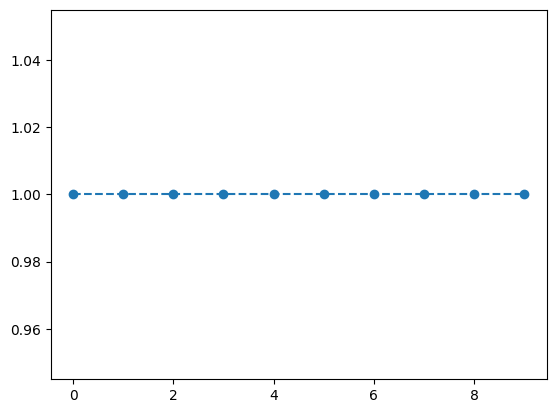

In [96]:
plt.plot(b,'--o')

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

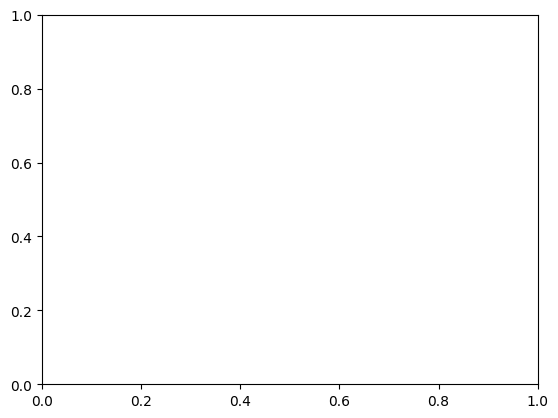

In [97]:
plt.plot(a*b,'--o') # 에러남

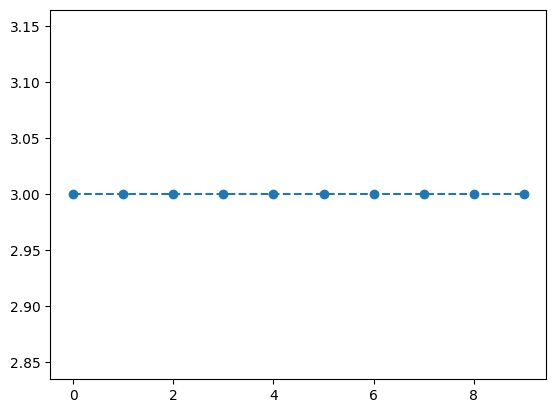

In [98]:
plt.plot(a.detach()*b,'--o') 

`#`

`# 예제2` -- 미분꼬리표를 제거하는 또다른 기능

`-` 예제1을 아래처럼 실수로 풀었다.

In [99]:
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor([1.0]*10)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

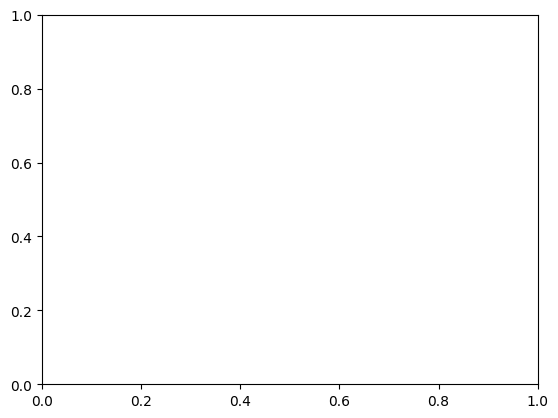

In [100]:
plt.plot(a*b.detach(),'--o')

`-` 아래와 같이 했어야 했는데, 섬세함이 부족했다.. 

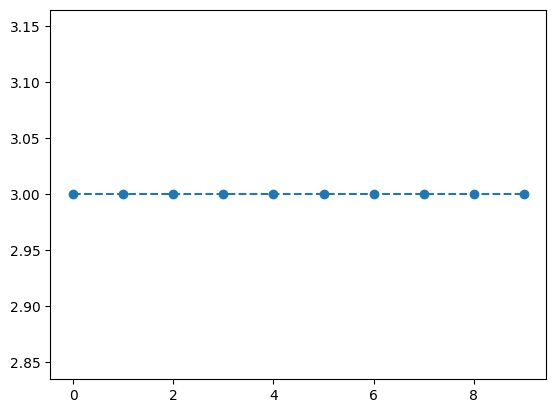

In [114]:
plt.plot((a*b).detach(),'--o')

- 앞으로 섬세하게 코딩하자??

`-` 앞으로 섬세하기 싫다면?? $\to$ `torch.set_grad_enabled()` 이용

In [102]:
torch.is_grad_enabled() # 미분꼬리표 정상적으로 부착되는 계산..

True

In [103]:
torch.set_grad_enabled(False)

In [105]:
torch.is_grad_enabled() # 꼬리표 계산안하는 모드..

False

In [106]:
a,b

(tensor(3., requires_grad=True),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [108]:
a*b # 꼬리표가 계산안됨!!

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

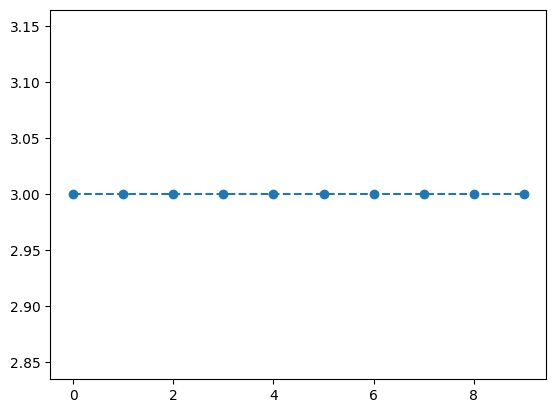

In [112]:
plt.plot(a*b,'--o')

In [113]:
torch.set_grad_enabled(True)

In [116]:
torch.is_grad_enabled() # 다시 원상복귀

True

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

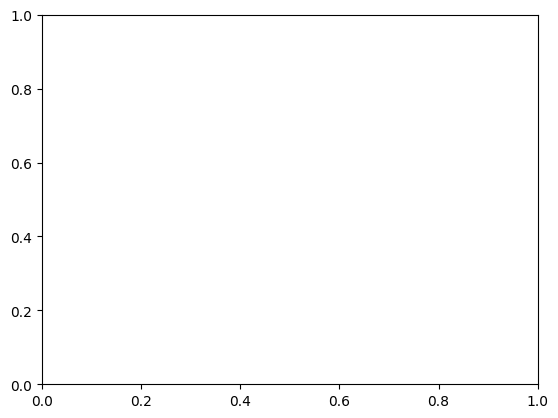

In [118]:
plt.plot(a*b,'--o') # 잘 안된다..

`#` 

`# 예제3` 

In [119]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
).to("cuda")
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]).to("cuda"),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]).to("cuda"),
    'labels': torch.tensor([0]).to("cuda") 
}
model(**model_input) # 모델_cuda(데이터_cuda)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SequenceClassifierOutput(loss=tensor(0.6561, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[ 0.0653, -0.0102]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [120]:
mp2024pkg.show_list(
    list(model.parameters())
 ) # detach()를 쓰려면 104개를 다 제거해야겠는뎅.. 

Level 1 - Type: list, Length: 104, Content: [Parameter containing:
te ... :0', requires_grad=True)]
     Level 2 - Type: Parameter, Length: 30522, Content: Parameter containing:
ten ... a:0', requires_grad=True)
     Level 2 - Type: Parameter, Length: 512, Content: Parameter containing:
ten ... a:0', requires_grad=True)
     ...
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ... a:0', requires_grad=True)
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ...       requires_grad=True)
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ... a:0', requires_grad=True)
     Level 2 - Type: Parameter, Length: 2, Content: Parameter containing:
ten ... a:0', requires_grad=True)
     Level 2 - Type: Parameter, Length: 2, Content: Parameter containing:
ten ... a:0', requires_grad=True)


In [126]:
torch.set_grad_enabled(False)

In [127]:
model(**model_input) # 꼬리표제거.. 

SequenceClassifierOutput(loss=tensor(0.6561, device='cuda:0'), logits=tensor([[ 0.0653, -0.0102]], device='cuda:0'), hidden_states=None, attentions=None)

In [128]:
torch.set_grad_enabled(True) # 다시 원상복귀..

: 

`#`